In [21]:
import numpy as np
import qutip as qt
import pulsee.plot as psplt
import operators as op
pi = np.pi
identity = qt.tensor(op.id, op.id)

In [38]:
omega_1 = 10 #Hz
omega_2 = 10 #Hz
J=22 #Hz
J_wrong=J*1.05 #5% off
t_pulse = .0027     #s
t_d7 = 1 / (2 * J_wrong)    #s
H_paper = np.pi * J * 2 * op.IzSz
omega = np.pi / 36   #5 degree error

U_J_pulse = qt.Qobj(-1j * H_paper * t_pulse).expm()
U_J_levitt_chemical_shift_1_pulse = qt.Qobj((-1j * omega_1 * t_pulse * op.Iz)).expm()
U_J_levitt_chemical_shift_2_pulse = qt.Qobj((-1j * omega_2 * t_pulse * op.Sz)).expm()
U_full_pulse = U_J_levitt_chemical_shift_1_pulse * U_J_levitt_chemical_shift_2_pulse * U_J_pulse

U_J_d7 = qt.Qobj(-1j * H_paper * t_d7).expm()
U_J_levitt_chemical_shift_1_d7 = qt.Qobj((-1j * omega_1 * t_d7 * op.Iz)).expm()
U_J_levitt_chemical_shift_2_d7 = qt.Qobj((-1j * omega_2 * t_d7 * op.Sz)).expm()
U_full_d7 = U_J_levitt_chemical_shift_1_d7 * U_J_levitt_chemical_shift_2_d7 * U_J_d7


def Rx_I(theta1):
    return op.Rx_I(theta1 / 2) * U_full_pulse * op.Rx_I(theta1 / 2)


def Rx_I(theta1):
    return op.Rx_I(theta1 / 2) * U_full_pulse * op.Rx_I(theta1 / 2)


def Ry_I(theta1):
    return op.Ry_I(theta1 / 2) * U_full_pulse * op.Ry_I(theta1 / 2)


def Rx_S(theta1):
    return op.Rx_S(theta1 / 2) * U_full_pulse * op.Rx_S(theta1 / 2)


def Ry_S(theta1):
    return op.Ry_S(theta1 / 2) * U_full_pulse * op.Ry_S(theta1 / 2)

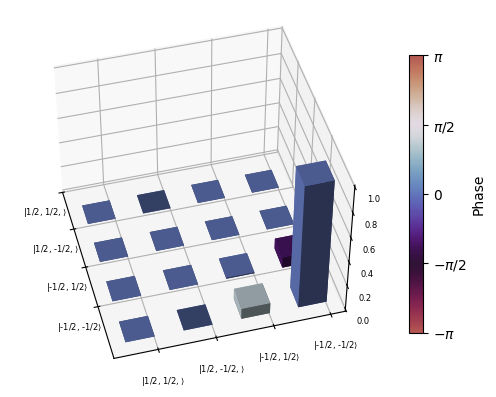

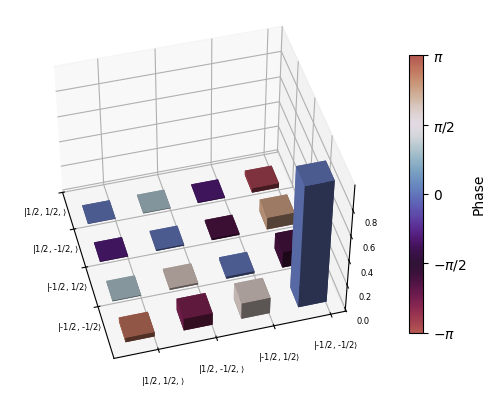

Effects from: just chemical shift evolution, finite pulses (with J coupling during), tip angle error, J coupling error


In [39]:


CNOT = Rx_S((np.pi / 2) + omega) * U_full_d7 * Ry_S((np.pi / 2) + omega)

Z = Rx_I((np.pi / 2) + omega) * Ry_I((np.pi / 2) + omega) * Rx_I(-((np.pi / 2) + omega)) * Rx_S(
    (np.pi / 2) + omega) * Ry_S(-((np.pi / 2) + omega)) * Rx_S(-((np.pi / 2) + omega))

CNOT_Phased_miss = Z * CNOT

psplt.plot_complex_density_matrix(CNOT * op.CLEAN_0010 * CNOT.dag())
psplt.plot_complex_density_matrix(CNOT_Phased_miss * op.CLEAN_0010 * CNOT_Phased_miss.dag())
print("Effects from: just chemical shift evolution, finite pulses (with J coupling during), tip angle error, J coupling error")